In [13]:
# connecting colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Exploratory Data Analysis**

### Installing and Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

In [31]:
sns.set_theme(style='darkgrid')

### Data Inspection

In [32]:
%cd drive/MyDrive/Covid\ Q\&A\ System/2-Data\ Pre-Processing/
df = pd.read_csv('FINAL_COVID_QA_DATASET.csv')
%cd ..
%cd 3-Exploratory\ Data\ Analysis
df.head(3)

/content/drive/MyDrive/Covid Q&A System/2-Data Pre-Processing
/content/drive/MyDrive/Covid Q&A System
/content/drive/MyDrive/Covid Q&A System/3-Exploratory Data Analysis


,sha,title,abstract,publish_time,authors,url,body_text
0,feedfe27a4eee49d8a1d09f50e8ecfe73057602a,Experiences and effects of telerehabilitation ...,BACKGROUND: The announcement of a national loc...,2021-06-30,"Ebrahim, Humairaa; Pillay-Jayaraman, Prithi; L...",https://www.ncbi.nlm.nih.gov/pubmed/34230898/;...,"As a result of the COVID-19 pandemic, many pat..."
1,c2ca01f12643a88e059e81619fb971fa61de3971,SCOAT-Net: A novel network for segmenting COVI...,Automatic segmentation of lung opacification f...,2021-06-10,"Zhao, Shixuan; Li, Zhidan; Chen, Yang; Zhao, W...",https://www.ncbi.nlm.nih.gov/pubmed/34127870/;...,"The coronavirus disease 2019 (COVID-19), which..."
2,d0d1e05bb14f068d8323807ba042860887b7aa00,A Comprehensive Review on Factors Influences B...,Exosomes are nanoscale-sized membrane vesicles...,2021-02-17,"Gurunathan, Sangiliyandi; Kang, Min-Hee; Kim, ...",https://doi.org/10.2147/ijn.s291956; https://w...,Extracellular vesicles (EVs) including exosome...


In [33]:
df.shape

(21970, 7)

In [34]:
def inspect_data(data):
  return pd.DataFrame(
      {
          'Data Types': data.dtypes,
          'No. of levels': data.apply(lambda x: len(x.unique()), axis=0),
          'levels': data.apply(lambda x: x.unique(), axis=0),
          'qtd_null': data.apply(lambda x: x.isnull().sum(), axis=0),
          'pct_null': data.apply(lambda x: x.isnull().sum() * 100 / len(x))
      }
  )

In [35]:
inspect_data(df)

,Data Types,No. of levels,levels,qtd_null,pct_null
sha,object,21970,"[feedfe27a4eee49d8a1d09f50e8ecfe73057602a, c2c...",0,0.000000
title,object,21935,[Experiences and effects of telerehabilitation...,0,0.000000
abstract,object,21912,[BACKGROUND: The announcement of a national lo...,0,0.000000
publish_time,object,3160,"[2021-06-30, 2021-06-10, 2021-02-17, 2015-07-2...",0,0.000000
authors,object,21768,"[Ebrahim, Humairaa; Pillay-Jayaraman, Prithi; ...",118,0.537096
url,object,21970,[https://www.ncbi.nlm.nih.gov/pubmed/34230898/...,0,0.000000
body_text,object,21934,"[As a result of the COVID-19 pandemic, many pa...",0,0.000000


In [36]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_year'] = df['publish_time'].dt.year
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day

In [37]:
# research paper publication distribution in year, month and day
print(df['publish_year'].nunique())
print(df['publish_month'].nunique())
print(df['publish_day'].nunique())

52
12
31


In [38]:
# earliest and latest research publication years
print(df['publish_year'].min())
print(df['publish_year'].max())

1968
2022


<Axes: xlabel='publish_year', ylabel='count'>

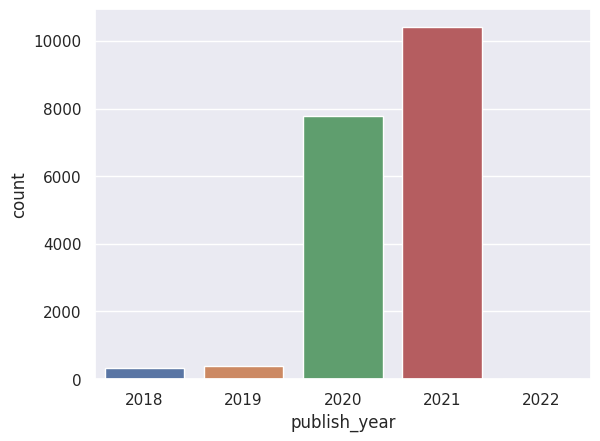

In [39]:
sns.countplot(x='publish_year', data= df[df['publish_year'].isin([2018, 2019, 2020, 2021, 2022])])

<Axes: xlabel='publish_month', ylabel='count'>

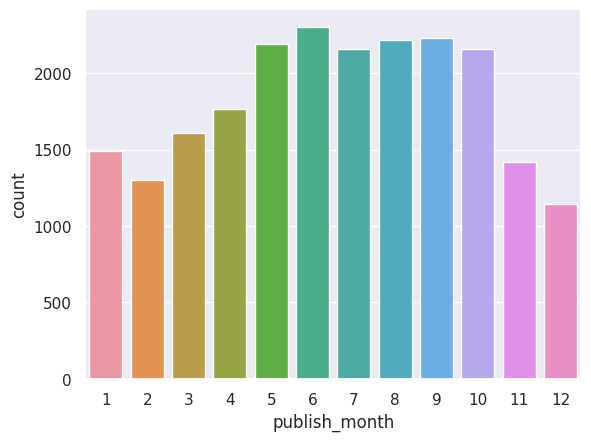

In [40]:
sns.countplot(x='publish_month', data=df)

#### Wordcloud Analysis

In [41]:
!pip install wordcloud

In [42]:
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [43]:
def plot_word_cloud(wordcloud):
  plt.figure(figsize=(10, 10))
  plt.imshow(wordcloud)
  plt.axis('off')

In [44]:
def remove_special_chars_and_puntuations(txt):
  pattern = r'[^a-zA-Z0-9\'\s]'
  txt = re.sub(pattern, '', txt)
  return ''.join([c for c in txt if c not in string.punctuation])

In [45]:
clean_abstract = df.loc[df.abstract.notnull(), 'abstract'].apply(remove_special_chars_and_puntuations)

In [46]:
def concat_all_sentences(sents):
  tokens = ''
  for txt in sents:
    tx = str(txt).lower().strip()
    tx = ' '.join(tx.split())
    tokens += tx + ''
  return tokens

In [47]:
abstract_token = concat_all_sentences(clean_abstract)

In [48]:
abstract_wordcloud = WordCloud(width=500, height=500, random_state=10).generate(abstract_token)

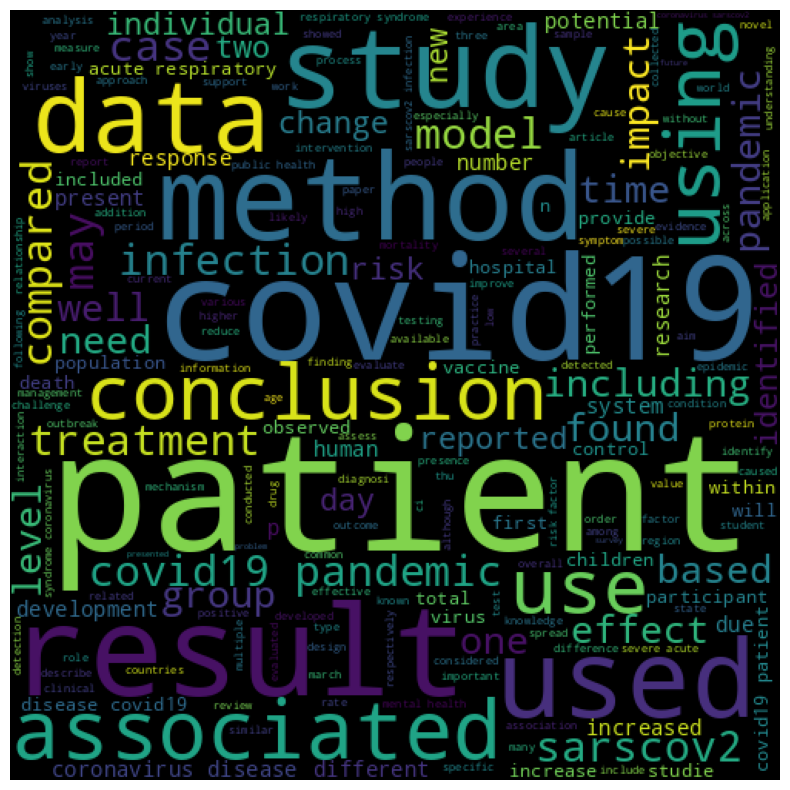

In [49]:
plot_word_cloud(abstract_wordcloud)

### Topic Modeling

In [50]:
!pip3 install gensim
!pip3 install spacy
!python3 -m spacy download en_core_web_sm

2023-10-23 06:51:20.898474: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 06:51:24.491447: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [51]:
 import gensim, spacy, logging, warnings
 import gensim.corpora as corpora
 from gensim.utils import simple_preprocess
 from gensim.models import CoherenceModel

In [52]:
abstracts = clean_abstract.values.tolist()

In [53]:
def token_builder(sentences) :
   for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True)
        yield(sent)

In [54]:
#Building abstract tokens using token_builder
abstract_tokens = list(token_builder(abstracts))

In [55]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(abstract_tokens, min_count=3, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[abstract_tokens], threshold=50)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [56]:
import nltk as nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [57]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [58]:
def process_docs(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]
    return texts_out


In [59]:
abstracts_data = process_docs(abstract_tokens)

In [60]:
# Create Dictionary
id2word = corpora.Dictionary(abstracts_data)

In [61]:
print(id2word)


Dictionary<66374 unique tokens: ['able', 'access', 'allow', 'alternative', 'announcement']...>


In [62]:
print(id2word.token2id)

{'able': 0, 'access': 1, 'allow': 2, 'alternative': 3, 'announcement': 4, 'ask': 5, 'attend': 6, 'background': 7, 'cancellation': 8, 'clinical': 9, 'communication': 10, 'conclusion': 11, 'consider': 12, 'coronavirus': 13, 'cost': 14, 'countrywide': 15, 'covid': 16, 'current': 17, 'deliver': 18, 'delivery': 19, 'discharge': 20, 'discussion': 21, 'disease': 22, 'electronic': 23, 'enable': 24, 'ensure': 25, 'experience': 26, 'face': 27, 'feasibility': 28, 'feasible': 29, 'format': 30, 'health': 31, 'hospital': 32, 'identification': 33, 'impact': 34, 'implication': 35, 'include': 36, 'indicate': 37, 'manage': 38, 'method': 39, 'methodsdesign': 40, 'mixed': 41, 'national': 42, 'necessary': 43, 'necessitate': 44, 'nonattendance': 45, 'nontraditional': 46, 'offer': 47, 'often': 48, 'outcome': 49, 'outpatient': 50, 'pactr': 51, 'pan': 52, 'pandemic': 53, 'participant': 54, 'patient': 55, 'physiotherapy': 56, 'postpandemic': 57, 'prefer': 58, 'prioritisation': 59, 'prospective': 60, 'protect': 

In [63]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in abstracts_data]

In [64]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [65]:
print(lda_model.print_topics())

[(0, '0.013*"infection" + 0.011*"sarscov" + 0.010*"virus" + 0.008*"viral" + 0.008*"cell" + 0.008*"disease" + 0.007*"protein" + 0.006*"study" + 0.005*"human" + 0.005*"show"'), (1, '0.021*"covid" + 0.020*"patient" + 0.011*"study" + 0.008*"result" + 0.008*"pandemic" + 0.006*"disease" + 0.006*"method" + 0.005*"datum" + 0.005*"health" + 0.005*"case"')]


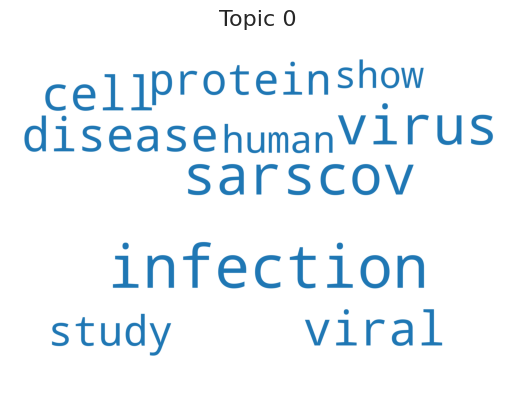

In [ ]:
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

for i in range(0,2):
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    plt.show()

In [ ]:
topics = lda_model.show_topics(formatted=False)

In [ ]:
topics